In [123]:
! pip uninstall -y -q tensorflow
! pip install -q tensorflow-gpu==2.8.0
! pip install -q deepmatch

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [125]:
from deepctr.models import *
import deepctr
import csv

In [126]:
user_recipe_df = pd.read_csv('user_recipe.csv',  encoding='utf-8')
user_recipe_df.head(2), user_recipe_df

(   user_id  recipe_id  rating           dateLastModified
 0       39      61727       4  2001-03-26T07:36:16.653\n
 1       39       7612       5  2004-08-02T16:48:37.107\n,
          user_id  recipe_id  rating           dateLastModified
 0             39      61727       4  2001-03-26T07:36:16.653\n
 1             39       7612       5  2004-08-02T16:48:37.107\n
 2             39      12009       4   2001-02-28T10:37:25.59\n
 3             39      88185       5  2009-05-18T14:55:11.517\n
 4             39      24445       5   2015-05-07T15:42:20.32\n
 ...          ...        ...     ...                        ...
 151143  21907115      12942       5   2010-02-26T07:06:39.46\n
 151144  21907115      16348       4   2009-07-17T14:15:47.27\n
 151145  21907115      24332       5  2008-02-20T13:08:55.997\n
 151146  21907115       7322       4   2012-11-19T07:22:35.54\n
 151147  21907115      18327       4   2016-04-12T04:10:38.48\n
 
 [151148 rows x 4 columns])

In [127]:
recipe_df = pd.read_csv('recipe_without_reviews.csv')
recipe_df.head(2)

,Unnamed: 0,recipe_id,recipe_name,review_nums,category,aver_rate,image_url,ingredients,cooking_directions,nutritions,tags
0,0,6698,Mom's Zucchini Bread,9355,appetizer,4.754207,https://images.media-allrecipes.com/userphotos...,all-purpose flour^salt^baking soda^baking powd...,{'directions': u'Prep\n20 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...",north-american;breads;easy;beginner-cook;inexp...
1,1,6709,Zucchini Walnut Bread,58,appetizer,4.478873,http://images.media-allrecipes.com/userphotos/...,chopped walnuts^eggs^white sugar^vegetable oil...,"{'directions': u'Whisk together flour, baking ...","{u'niacin': {u'hasCompleteData': True, u'name'...",weeknight;breads;fruit;vegetables;kid-friendly...


In [128]:
user_meal_df = pd.read_csv('user_meal.csv')
user_meal_df.head(2)

,meal_id,user_id
0,26,39
1,37,39


In [129]:
meal_df = pd.read_csv('meal.csv')
meal_df.head(2)

,bundle_id,appetizer,main_dish,dessert
0,242,8626,8652,17652
1,885,15034,25272,24843


In [130]:
# merging user_recipe and recipe df
user_recipe_merged_df = user_recipe_df.merge(recipe_df, on='recipe_id')
user_recipe_merged_df.head(4)

,user_id,recipe_id,rating,dateLastModified,Unnamed: 0,recipe_name,review_nums,category,aver_rate,image_url,ingredients,cooking_directions,nutritions,tags
0,39,61727,4,2001-03-26T07:36:16.653\n,4262,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,https://images.media-allrecipes.com/userphotos...,vegetable oil^self-rising flour^New Mexico^tom...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",15-minutes-or-less;north-american;sauces;condi...
1,8799,61727,5,2004-09-21T06:23:16.427\n,4262,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,https://images.media-allrecipes.com/userphotos...,vegetable oil^self-rising flour^New Mexico^tom...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",15-minutes-or-less;north-american;sauces;condi...
2,35974,61727,5,2003-04-19T07:31:14.357\n,4262,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,https://images.media-allrecipes.com/userphotos...,vegetable oil^self-rising flour^New Mexico^tom...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",15-minutes-or-less;north-american;sauces;condi...
3,89295,61727,5,2011-09-01T17:50:36.427\n,4262,Ten Minute Enchilada Sauce,2443,main-dish,4.439774,https://images.media-allrecipes.com/userphotos...,vegetable oil^self-rising flour^New Mexico^tom...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",15-minutes-or-less;north-american;sauces;condi...


In [131]:
all_columns = user_recipe_merged_df.columns
all_columns

Index(['user_id', 'recipe_id', 'rating', 'dateLastModified', 'Unnamed: 0',
       'recipe_name', 'review_nums', 'category', 'aver_rate', 'image_url',
       'ingredients', 'cooking_directions', 'nutritions', 'tags'],
      dtype='object')

In [132]:
user_recipe_merged_df.user_id.unique(), user_recipe_merged_df.user_id.nunique()

(array([     39,    8799,   35974, ..., 2549544,  798244, 2695053]), 1575)

In [133]:
user_recipe_merged_df.recipe_name.unique(), user_recipe_merged_df.recipe_name.nunique()

(array(['Ten Minute Enchilada Sauce', "Chocolate Lovers' Favorite Cake",
        'Cajun Chicken Pasta', ..., 'Fiesta Lime Chicken',
        'Spinach and Artichoke Greek Yogurt Dip',
        'Chewy Chocolate Peanut Bars'], dtype=object),
 7280)

In [134]:
user_recipe_merged_df.rating.value_counts()

rating
5    101162
4     49986
Name: count, dtype: int64

In [135]:
# unique category of recipes
unique_categories = user_recipe_merged_df.category.unique()
unique_categories, user_recipe_merged_df.category.nunique()

(array(['main-dish', 'dessert', 'appetizer'], dtype=object), 3)

## Visualizing the info

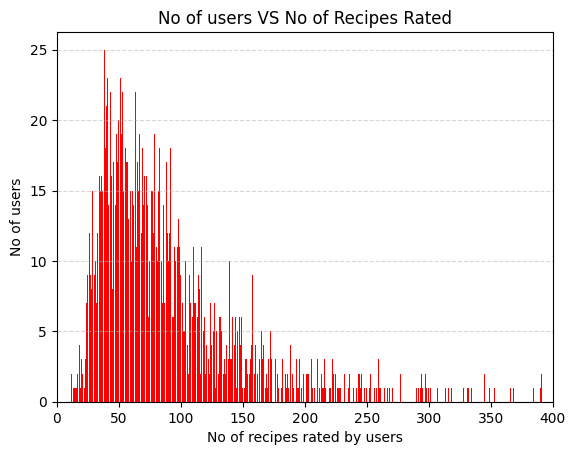

In [136]:
users_recipe_counts = user_recipe_merged_df['user_id'].value_counts().sort_index()
users_per_recipe_count = users_recipe_counts.value_counts().sort_index()

plt.bar(users_per_recipe_count.index, users_per_recipe_count.values, color='red')
plt.xlabel('No of recipes rated by users')
plt.ylabel('No of users')
plt.xlim(0,400)
plt.title('No of users VS No of Recipes Rated')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

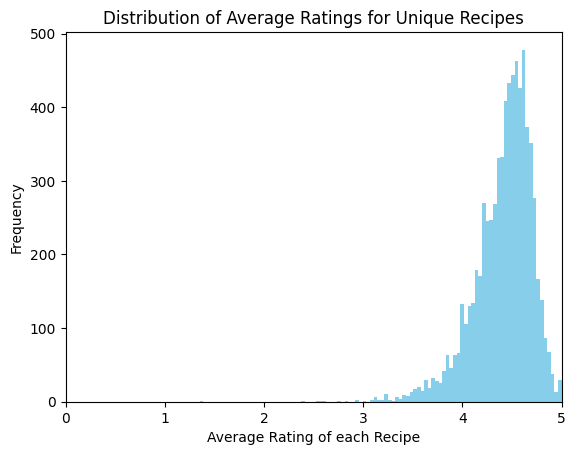

In [137]:
avg_ratings = user_recipe_merged_df.groupby('recipe_id')['aver_rate'].mean()

plt.hist(avg_ratings, bins=100, color='skyblue')
plt.xlabel('Average Rating of each Recipe')
plt.ylabel('Frequency')
plt.xlim(0,5)
plt.title('Distribution of Average Ratings for Unique Recipes')
plt.show()

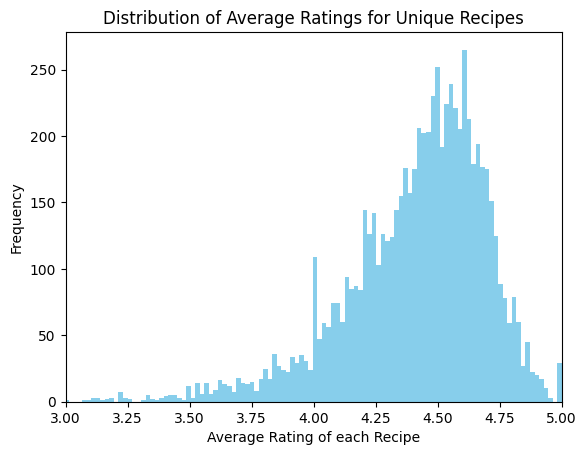

In [138]:
plt.hist(avg_ratings, bins=200, color='skyblue')
plt.xlabel('Average Rating of each Recipe')
plt.ylabel('Frequency')
plt.xlim(3,5)
plt.title('Distribution of Average Ratings for Unique Recipes')
plt.show()

In [139]:
df = user_recipe_merged_df
df['dateLastModified']

0         2001-03-26T07:36:16.653\n
1         2004-09-21T06:23:16.427\n
2         2003-04-19T07:31:14.357\n
3         2011-09-01T17:50:36.427\n
4         2008-02-07T17:04:54.523\n
                    ...            
151143    2016-04-30T00:28:25.337\n
151144    2015-09-03T07:24:05.267\n
151145     2016-09-19T17:46:18.66\n
151146    2017-03-12T16:35:22.007\n
151147    2005-02-25T17:59:35.233\n
Name: dateLastModified, Length: 151148, dtype: object

In [140]:
# preprocessing the date modified to get the hour of recommendation
# the hour at which review was given can be an insight maybe?
df["datetime"] = pd.to_datetime(df['dateLastModified'], format="mixed")
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df.hour.unique()

array([ 7,  6, 17, 19, 15, 16,  8, 23,  4, 10, 18, 13, 11, 12,  2, 20, 22,
        5, 21, 14,  9,  0,  3,  1], dtype=int32)

In [141]:
from sklearn.model_selection import train_test_split


## Model with Using only Hour of the Day

In [142]:
# df[['user_id', 'hour']]
df['aver_rate'].unique(), df['aver_rate'].nunique()

(array([4.43977356, 4.68384552, 4.67671633, ..., 3.5454545 , 4.11320734,
        3.69230771]),
 4033)

Epoch 1/20
355/355 [==============================] - 4s 8ms/step - loss: 1.7413 - mse: 1.7413 - accuracy: 0.0000e+00 - val_loss: 0.1986 - val_mse: 0.1985 - val_accuracy: 0.0000e+00
Epoch 2/20
355/355 [==============================] - 4s 12ms/step - loss: 0.2000 - mse: 0.2000 - accuracy: 0.0000e+00 - val_loss: 0.1978 - val_mse: 0.1978 - val_accuracy: 0.0000e+00
Epoch 3/20
355/355 [==============================] - 7s 18ms/step - loss: 0.1988 - mse: 0.1987 - accuracy: 0.0000e+00 - val_loss: 0.1995 - val_mse: 0.1994 - val_accuracy: 0.0000e+00
Epoch 4/20
355/355 [==============================] - 5s 15ms/step - loss: 0.1985 - mse: 0.1984 - accuracy: 0.0000e+00 - val_loss: 0.1975 - val_mse: 0.1974 - val_accuracy: 0.0000e+00
Epoch 5/20
355/355 [==============================] - 7s 21ms/step - loss: 0.1982 - mse: 0.1981 - accuracy: 0.0000e+00 - val_loss: 0.1988 - val_mse: 0.1987 - val_accuracy: 0.0000e+00
Epoch 6/20
355/355 [==============================] - 5s 14ms/step - loss: 0.1981 - ms

<ipython-input-143-a71d8994ae3e>:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
<ipython-input-143-a71d8994ae3e>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')


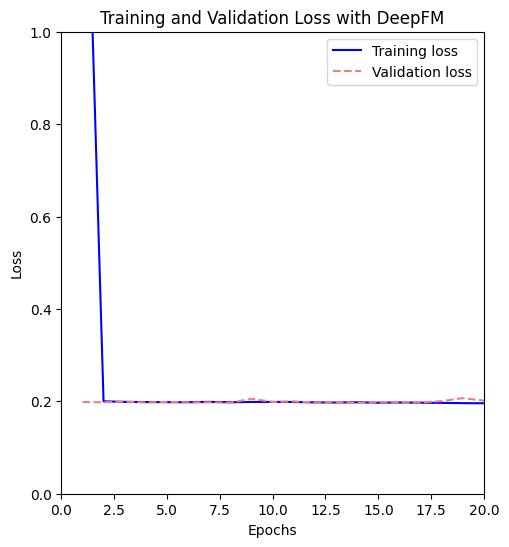

In [143]:
df_user_hour = df

# since the rating is only 4 or 5, it can be treated as categorical value
sparse_features_user_hour = ['user_id', 'hour']
target = ['rating']

df_user_hour[sparse_features_user_hour] = df_user_hour[sparse_features_user_hour].fillna(0)

label_encoders_user_hour = {}
for feature in sparse_features_user_hour:
  lbe = sklearn.preprocessing.LabelEncoder()
  df_user_hour[feature] = lbe.fit_transform(df_user_hour[feature])
  label_encoders_user_hour[feature] = lbe

train, test = train_test_split(df_user_hour, test_size=0.25)

feature_columns_user_hour = [deepctr.feature_column.SparseFeat(feature, vocabulary_size = df_user_hour[feature].max() + 1, embedding_dim=6) for feature in sparse_features_user_hour]

dnn_feature_columns_user_hour = feature_columns_user_hour
linear_feature_columns_user_hour = feature_columns_user_hour
feature_names_user_hour = deepctr.feature_column.get_feature_names(linear_feature_columns_user_hour+dnn_feature_columns_user_hour)

epochs = 20

# getting the train and test data for the model input ready
train_model_input_user_hour = {name: train[name] for name in feature_names_user_hour}
test_model_input_user_hour = {name: test[name] for name in feature_names_user_hour}

model_user_hour = deepctr.models.DeepFM(linear_feature_columns_user_hour, dnn_feature_columns_user_hour, task='regression')

model_user_hour.compile('adam', 'mse', metrics=['mse', 'accuracy'])

history_user_hour = model_user_hour.fit(train_model_input_user_hour, train[target].values, batch_size=256, epochs = epochs, verbose = 1, validation_split = 0.2)

mse_user_hour = model_user_hour.evaluate(test_model_input_user_hour, test[target].values, batch_size=256)[1]
print(f'MSE IS :{mse_user_hour}')

loss = history_user_hour.history['loss']
val_loss = history_user_hour.history['val_loss']

epoch_arr = list(range(1, epochs+1))

# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.title('Training and Validation Loss with DeepFM')
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
355/355 [==============================] - 4s 8ms/step - loss: 1.7632 - mse: 1.7632 - accuracy: 0.0000e+00 - val_loss: 0.1989 - val_mse: 0.1989 - val_accuracy: 0.0000e+00
Epoch 2/20
355/355 [==============================] - 4s 12ms/step - loss: 0.1991 - mse: 0.1990 - accuracy: 0.0000e+00 - val_loss: 0.1986 - val_mse: 0.1985 - val_accuracy: 0.0000e+00
Epoch 3/20
355/355 [==============================] - 2s 6ms/step - loss: 0.1981 - mse: 0.1981 - accuracy: 0.0000e+00 - val_loss: 0.2016 - val_mse: 0.2015 - val_accuracy: 0.0000e+00
Epoch 4/20
355/355 [==============================] - 2s 6ms/step - loss: 0.1981 - mse: 0.1980 - accuracy: 0.0000e+00 - val_loss: 0.1971 - val_mse: 0.1970 - val_accuracy: 0.0000e+00
Epoch 5/20
355/355 [==============================] - 2s 6ms/step - loss: 0.1972 - mse: 0.1971 - accuracy: 0.0000e+00 - val_loss: 0.1975 - val_mse: 0.1974 - val_accuracy: 0.0000e+00
Epoch 6/20
355/355 [==============================] - 2s 6ms/step - loss: 0.1974 - mse: 0

<ipython-input-144-1dfb0c03e6a5>:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
<ipython-input-144-1dfb0c03e6a5>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')


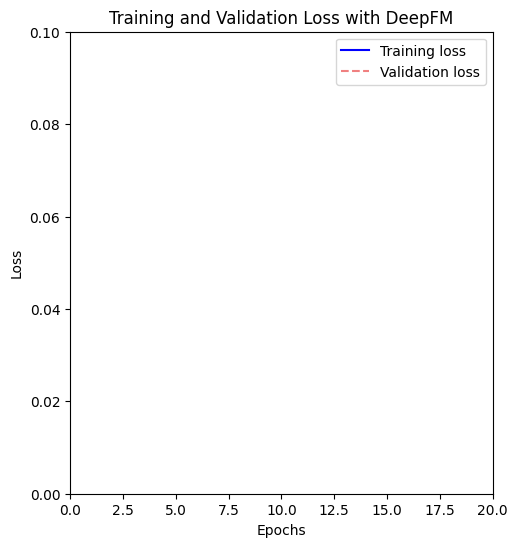

In [144]:
df_user_hour = df

# since the rating is only 4 or 5, it can be treated as categorical value
sparse_features_user_hour = ['user_id', 'hour']
target = ['rating']

df_user_hour[sparse_features_user_hour] = df_user_hour[sparse_features_user_hour].fillna(0)

label_encoders_user_hour = {}
for feature in sparse_features_user_hour:
  lbe = sklearn.preprocessing.LabelEncoder()
  df_user_hour[feature] = lbe.fit_transform(df_user_hour[feature])
  label_encoders_user_hour[feature] = lbe

train, test = train_test_split(df_user_hour, test_size=0.25)

feature_columns_user_hour = [deepctr.feature_column.SparseFeat(feature, vocabulary_size = df_user_hour[feature].max() + 1, embedding_dim=6) for feature in sparse_features_user_hour]

dnn_feature_columns_user_hour = feature_columns_user_hour
linear_feature_columns_user_hour = feature_columns_user_hour
feature_names_user_hour = deepctr.feature_column.get_feature_names(linear_feature_columns_user_hour+dnn_feature_columns_user_hour)

epochs = 20

# getting the train and test data for the model input ready
train_model_input_user_hour = {name: train[name] for name in feature_names_user_hour}
test_model_input_user_hour = {name: test[name] for name in feature_names_user_hour}

model_user_hour = deepctr.models.DeepFM(linear_feature_columns_user_hour, dnn_feature_columns_user_hour, task='regression')

model_user_hour.compile('adam', 'mse', metrics=['mse', 'accuracy'])

history_user_hour = model_user_hour.fit(train_model_input_user_hour, train[target].values, batch_size=256, epochs = epochs, verbose = 1, validation_split = 0.2)

mse_user_hour = model_user_hour.evaluate(test_model_input_user_hour, test[target].values, batch_size=256)[1]
print(f'MSE IS :{mse_user_hour}')

loss = history_user_hour.history['loss']
val_loss = history_user_hour.history['val_loss']

epoch_arr = list(range(1, epochs+1))

# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.title('Training and Validation Loss with DeepFM')
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_ylim([0,0.1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Adding more features for the model

In [145]:
df['ingredients'] = df['ingredients'].str.replace('^', '|')
df['ingredients'] = df['ingredients'].str.replace(' ', '')
df['ingredients']

0         vegetableoil|self-risingflour|NewMexico|tomato...
1         vegetableoil|self-risingflour|NewMexico|tomato...
2         vegetableoil|self-risingflour|NewMexico|tomato...
3         vegetableoil|self-risingflour|NewMexico|tomato...
4         vegetableoil|self-risingflour|NewMexico|tomato...
                                ...                        
151143    quinoarinsedanddrained|water|oliveoil|smalloni...
151144    KRAFTRoastedRedPepperItalianwithParmesanDressi...
151145    bonelessskinlesschickenbreasts|vegetableoil|li...
151146    oliveoil|bagfreshspinach|artichokeheartsdraine...
151147    cornsyrup|peanutbutter|semisweetchocolatechips...
Name: ingredients, Length: 151148, dtype: object

In [146]:
def split(x):
    key_ans = x.split('|')
    for key in key_ans:
        if key not in key2index:
            # Notice : input value 0 is a special "padding",so we do not use 0 to encode valid feature for sequence input
            key2index[key] = len(key2index) + 1
    return list(map(lambda x: key2index[x], key_ans))

In [148]:
df_mixed = df

# since the rating is only 4 or 5, it can be treated as categorical value
sparse_features_mixed = ['user_id', 'hour', 'category']
variable_length_features = ['ingredients']
target = ['rating']

df_mixed[sparse_features_mixed] = df_mixed[sparse_features_mixed].fillna(0)

label_encoders_mixed = {}
for feature in sparse_features_mixed:
  lbe = sklearn.preprocessing.LabelEncoder()
  df_mixed[feature] = lbe.fit_transform(df_mixed[feature])
  label_encoders_mixed[feature] = lbe

train, test = train_test_split(df_mixed, test_size=0.25)

# -------------------DIFFERENT FEATURES---------------------------------------------------------


key2index = {}
ingredients_list = list(map(split, df_mixed['ingredients'].values))
ingredients_length = np.array(list(map(len, ingredients_list)))
max_len = max(ingredients_length)

feature_columns_mixed = [deepctr.feature_column.SparseFeat(feature, vocabulary_size = df_mixed[feature].max() + 1, embedding_dim=4) for feature in sparse_features_mixed]

varlen_feature_columns = [deepctr.feature_column.VarLenSparseFeat(deepctr.feature_column.SparseFeat('ingredients', vocabulary_size=len(key2index) + 1, embedding_dim=4), maxlen=max_len, combiner='mean', weight_name=None)]

dnn_feature_columns_mixed = feature_columns_mixed + varlen_feature_columns
linear_feature_columns_mixed = feature_columns_mixed + varlen_feature_columns
feature_names_mixed = deepctr.feature_column.get_feature_names(linear_feature_columns_mixed+dnn_feature_columns_mixed)


In [150]:
feature_names_mixed, varlen_feature_columns

(['user_id', 'hour', 'category', 'ingredients'],
 [VarLenSparseFeat(sparsefeat=SparseFeat(name='ingredients', vocabulary_size=8750, embedding_dim=4, use_hash=False, vocabulary_path=None, dtype='int32', embeddings_initializer=<tensorflow.python.keras.initializers.initializers_v1.RandomNormal object at 0x7cdbdda20ca0>, embedding_name='ingredients', group_name='default_group', trainable=True), maxlen=28, combiner='mean', length_name=None, weight_name=None, weight_norm=True)])

In [152]:
# ------------------FOR MODEL ------------------------------------------------------------------

epochs = 5

# getting the train and test data for the model input ready
train_model_input_mixed = {name: train[name] for name in feature_names_mixed}
train_model_input_mixed["ingredients"] = ingredients_list
train_model_input_mixed["ingredients_weight"] = np.random.randn(df_mixed.shape[0], max_len, 1)

test_model_input_mixed = {name: test[name] for name in feature_names_mixed}


# -------------------------MODEL ---------------------------------------------------------------

model_mixed = deepctr.models.DeepFM(linear_feature_columns_mixed, dnn_feature_columns_mixed, task='regression')

model_mixed.compile('adam', 'mse', metrics=['mse'])
model_mixed

## Colab Disconnected!

In [ ]:
print('model training started')
history_mixed = model_mixed.fit(train_model_input_mixed, train[target].values, batch_size=32, epochs = epochs, verbose = 1, validation_split = 0.2)

mse_mixed = model_mixed.evaluate(test_model_input_mixed, test[target].values, batch_size=32)[1]
print(f'MSE IS :{mse_mixed}')
# ----------------------------------------------------------------------------------

model training started


In [ ]:

loss = history_mixed.history['loss']
val_loss = history_mixed.history['val_loss']

epoch_arr = list(range(1, epochs+1))

# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_arr, loss, 'b-', label='Training loss', color='blue')
plt.plot(epoch_arr, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.title('Training and Validation Loss with DeepFM')
ax = plt.gca()
ax.set_xlim([0,20])
ax.set_ylim([0,0.1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()